url : https://www.kaggle.com/datasets/mojocolors/900000-hands-of-blackjack-results                 
download : https://www.kaggle.com/datasets/mojocolors/900000-hands-of-blackjack-results/download?datasetVersionNumber=1

In [49]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/kaggle/input/900000-hands-of-blackjack-results/blkjckhands.csv')

In [3]:
data

,Unnamed: 0,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
0,0,Player1,7,10,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
1,1,Player2,10,9,0,0,0,19,10,8,...,0,0,18,nowin,Win,Plwin,Beat,20,0,19
2,2,Player3,9,8,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
3,3,Player4,2,10,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
4,4,Player5,10,2,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,1,Player2,10,7,0,0,0,17,3,9,...,2,0,18,nowin,Loss,Beat,Dlwin,0,10,17
899996,2,Player3,6,1,10,0,0,17,3,9,...,2,0,18,nowin,Loss,Beat,Dlwin,0,10,7
899997,3,Player4,4,2,9,0,0,15,3,9,...,2,0,18,nowin,Loss,Beat,Dlwin,0,10,6
899998,4,Player5,9,10,0,0,0,19,3,9,...,2,0,18,nowin,Win,Plwin,Beat,20,0,19


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   900000 non-null  int64 
 1   PlayerNo     900000 non-null  object
 2   card1        900000 non-null  int64 
 3   card2        900000 non-null  int64 
 4   card3        900000 non-null  int64 
 5   card4        900000 non-null  int64 
 6   card5        900000 non-null  int64 
 7   sumofcards   900000 non-null  int64 
 8   dealcard1    900000 non-null  int64 
 9   dealcard2    900000 non-null  int64 
 10  dealcard3    900000 non-null  int64 
 11  dealcard4    900000 non-null  int64 
 12  dealcard5    900000 non-null  int64 
 13  sumofdeal    900000 non-null  int64 
 14  blkjck       900000 non-null  object
 15  winloss      900000 non-null  object
 16  plybustbeat  900000 non-null  object
 17  dlbustbeat   900000 non-null  object
 18  plwinamt     900000 non-null  int64 
 19  dl

In [5]:
data = data.drop('Unnamed: 0',axis=1)

In [6]:
{col : data[col].unique() for col in data.columns if data[col].dtypes == 'object'}

{'PlayerNo': array(['Player1', 'Player2', 'Player3', 'Player4', 'Player5', 'Player6'],
       dtype=object),
 'blkjck': array(['nowin', 'Win'], dtype=object),
 'winloss': array(['Loss', 'Win', 'Push'], dtype=object),
 'plybustbeat': array(['Beat', 'Plwin', 'Bust', 'DlBust', 'Push'], dtype=object),
 'dlbustbeat': array(['Dlwin', 'Beat', 'PlBust', 'Bust', 'Push'], dtype=object)}

In [7]:
binary_fetures = ['blkjck']

ordinal_fetures = ['winloss','PlayerNo']
ordinal_fet = ['Loss', 'Push' , 'Win']
oridnal_fet2 = ['Player1', 'Player2', 'Player3', 'Player4', 'Player5', 'Player6']

#nominal_fetures = ['plybustbeat','dlbustbeat']
#nominal_prefix =['ply_','dealer_']
data = data.drop(['plybustbeat','dlbustbeat'],axis=1)

In [8]:
data['blkjck'] = data['blkjck'].apply(lambda x: 1 if x=='Win' else 0)
data['winloss'] = data['winloss'].apply(lambda x: ordinal_fet.index(x))
data['PlayerNo'] = data['PlayerNo'].apply(lambda x: oridnal_fet2.index(x))

#for col  , prefix in zip(nominal_fetures , nominal_prefix):
    #dummie = pd.get_dummies(data[col],prefix=prefix).astype(np.int)
    #data = pd.concat([data,dummie],axis=1)
    #data = data.drop(col,axis=1)

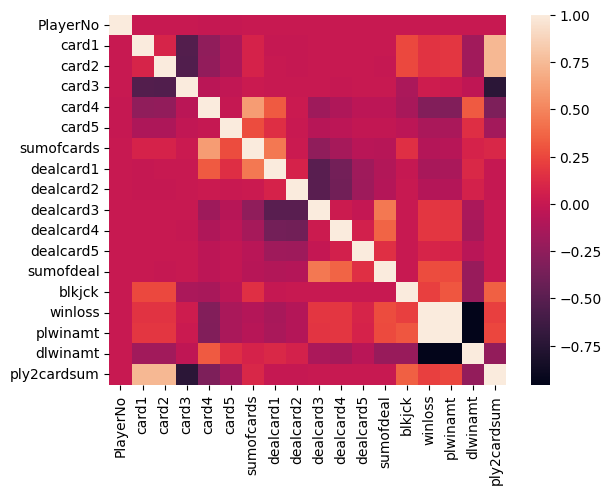

In [9]:
sns.heatmap(data.corr())
plt.show()

In [10]:
y = data['blkjck']
x = data.drop(['blkjck','winloss'],axis=1)

In [11]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x) ,  columns = x.columns)


In [12]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.7,random_state=7)

In [14]:
x.shape
#y.mean()

(900000, 16)

In [15]:
inputs = tf.keras.Input(shape=(16,))
x = tf.keras.layers.Dense(64,activation='relu')(inputs)
x = tf.keras.layers.Dense(64,activation='relu')(x)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.Model(inputs = inputs , outputs = outputs)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)
epochs = 5
hist = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=40,
    epochs=epochs
)

12600/12600 [==============================] - 39s 3ms/step - loss: 0.0042 - auc: 0.9999 - val_loss: 8.1014e-06 - val_auc: 1.0000


In [16]:
plt.figure(figsize=(3,2))
fig = px.line(
    hist.history,
    y=['loss','val_loss']
)
fig.show()

<Figure size 300x200 with 0 Axes>

In [17]:
model.evaluate(x_test,y_test)

8438/8438 [==============================] - 23s 3ms/step - loss: 2.7329e-06 - auc: 1.0000


[2.7329269869369455e-06, 1.0]

In [47]:
y_pred = model.predict(x_test)
y_pred = np.where(y_pred >= 0.5 , 1 , 0 )


8438/8438 [==============================] - 14s 2ms/step


In [48]:
y_pred.sum() / y_test.sum()

1.0

#### Thank you so much for watching
##### *i hope you enjoy :)*